# **How to launch the code Sim agent**

Firstly, we need to install all the required libraries in a new conda environment (make sure you installed it and if not, install it). 
This step is necessary for the local launch

In [ ]:
!conda --version                           #verify if conda exists
!conda create --name sim_agent python=3.9  #creates a conda environment 
!conda activate sim_agent                  #activates conda environment 

Installation of required libraries

In [ ]:
!pip install tensorflow==2.11.0
!pip install tqdm
!pip install PyYAML==6.0

# If you launch the code from Colab, you'll need to give access to your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Now, we need to clone the git repository on our computer or drive 


In [ ]:
#déplacement dans le bon répertoir (changez ce lien sur un lien de repertoir qui vous convien)
%cd //content/drive/MyDrive/New_folder/    
%pwd                                      #verification du chemain
!ls                                       #visionnement du répertoir
#clonage du projet                   
!git clone https://github.com/XeniaTitova/Sim_agent.git
!ls                                       #visionnement du répertoir (un fichier Sim_agent doit être apparu)
%cd Sim_agent/
!ls                                       #nous devons voir tout les fichier du git

Before launching the code we still need to create folders to store input and output data.


In [ ]:
!mkdir input_tf
!mkdir out
!mkdir out_visual

In [ ]:
!ls

Put Waymo dataset files in input_tf.
To download the dataset, you have to subscribe here : https://waymo.com/intl/en_us/open/licensing/
Then you'll have to upload a .tfrecord file from the website
 https://console.cloud.google.com/storage/browser/waymo_open_dataset_motion_v_1_1_0/uncompressed/tf_example/training;tab=objects?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false

## ** Launching the code **
Before we start learning the model, we need to format the data. This operation is used to eliminate unnecessary data, reorganize interesting data and, above all, convert the .tfrecord format into a more practical format.

After reorganizing the data, we'll no longer find large scenarios representing an entire neighborhood. Instead, we'll find small scenes centered on a single vehicle. More concretely, for each vehicle in the dataset, we reconstitute its surroundings within a definable radius. We ignore all informations beyond this radius. This gives us a large, compact dataset.

In addition to filtering out unnecessary data, our code normalizes the data by centering it around the main actor. Below we see the exact structure of the new data.




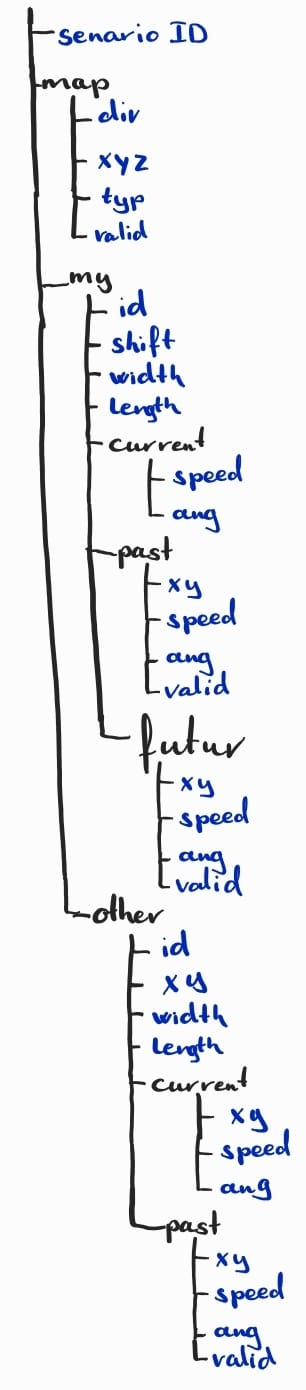

To create our data set, we execute this code:
The output files will be saved in the \out file created earlier.
This code creates around 8000 files for each .tfrecord and can therefore take a long time to run. Feel free to interrupt the code after a few percent if you don't need the whole data set.

In [ ]:
!python3 prerender.py

The next step is not useful for learning, but is very useful for visualizing the prerender's work. With this command line, we create a figure for each file generated in the previous step. These visualizations will be stored in the \out_visual file created earlier.

Below is an example of data visualization:

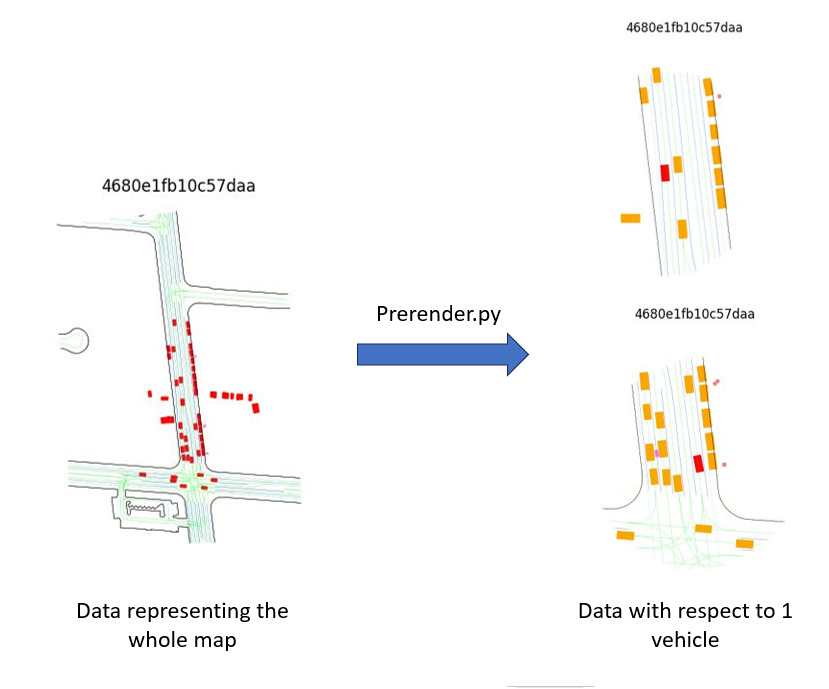

In [ ]:
!python3 visualiser.py

## **Model training**
Unfortunately, the project could not be finalized and have a working model.
However, we did make two small example models, one linear, the other using convolutions, both of which attempt to predict the future position of a vehicle based on its previous 10 positions.

These models are far from producing a correct result and are highly minimized, but they can still serve as examples of how to use the data structure we've produced.

To launch one of the models, you can use one of the following commands :

In [ ]:
!python3 trainCNN.py

In [ ]:
!python3 trainLinear.py